**EXPLORATORY DATA ANALYSIS OF PORTUGAL FOREST FIRES**

**Dataset Information**

This is a dataset of 517 forest fires in Montesinho park, Portugal from January 2000 to December 2003. It was compiled and made availabe by Cortez and morais,2007.

Data attributes:
* X : x-axis coordinates(1 - 9).
* Y : y-axis coordinates(1 - 9).
* Month : Months of the year(1 - 12).
* Day : Days of the week(1 - 7).
* FFMC : Fine Fuel Moisture Code(18.7 - 96.2).
* DMC : Duff Moisture Code(1.1 - 291.3).
* DC : Drought Code(7.9 - 860.6).
* ISI : Initial Spread Index(0 - 56.1).
* Temp: Temperature(2.2°C - 33.3°C).
* RH : Relative Humidity(15% - 100%).
* Wind : Wind Speed(Km/hr)(0.40 - 9.40).
* Rain : Rain(mm)(0.0 - 6.4).
* Burned Area : Total burned area(ha)(0 - 1090.84).

**Importing the required libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Loading the data and checking the first five rows.**

In [2]:
data = pd.read_csv('/kaggle/input/forest-forest-dataset/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**Checking the data for missing entries.**

In [3]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

**No missing values found.**

**Converting the month and day column from categorical values to numerical values and checking the first five rows of the data again.**

In [4]:
data['month'] = data['month'].replace({'jan': 1, 'feb':2, 'mar': 3, 'apr':4, 'may': 5, 'jun' :6,  'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov':11, 'dec': 12})
data['day'] = data['day'].replace({'mon':1, 'tue':2, 'wed':3,'thu':4, 'fri':5,'sat':6,'sun':7})
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**Histogram distribution of the burnt areas.**

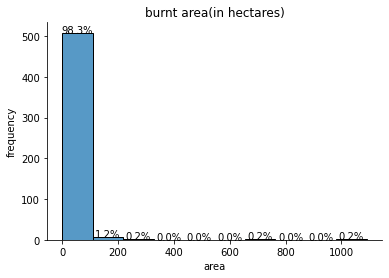

In [5]:
ax = sns.histplot(data.area, bins = 10)
sns.despine()
plt.title('burnt area(in hectares)')
plt.ylabel('frequency')
total = float(len(data.area))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

**Transforming the burnt area with natural logarithm and comparing the plot with the untransformed plot.**

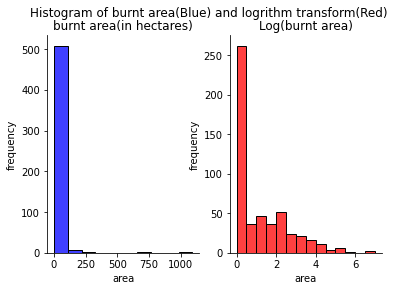

In [6]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Histogram of burnt area(Blue) and logrithm transform(Red)')
sns.despine()
sns.histplot(data.area, bins = 10, color ='b',ax = axes[0])
axes[0].set_title('burnt area(in hectares)')
axes[0].set_ylabel('frequency')
sns.histplot(np.log(data.area +1), color = 'r', ax = axes[1])
axes[1].set_title('Log(burnt area)')
axes[1].set_ylabel('frequency')
plt.show()

**Plot showing the frequency of forest fires by month.**

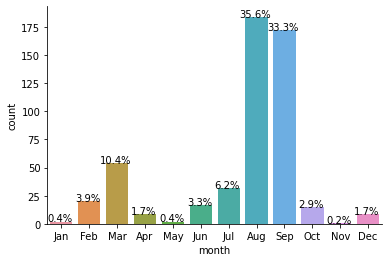

In [7]:
ax = sns.countplot(x =data.month)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sns.despine()
total = float(len(data.month))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

**Plot showing the frequency of forest fires in days of the week.**

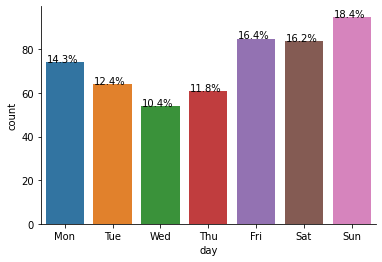

In [8]:
ax = sns.countplot(x =data.day)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sns.despine()
total = float(len(data.day))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

**Plots showing the distribution of the remaining attributes and their densities.**

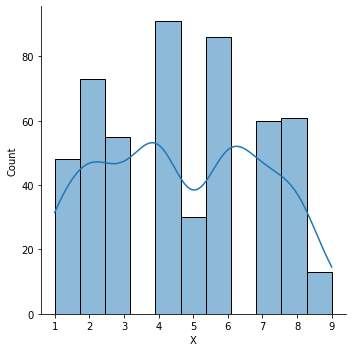

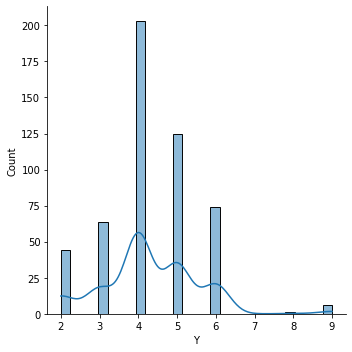

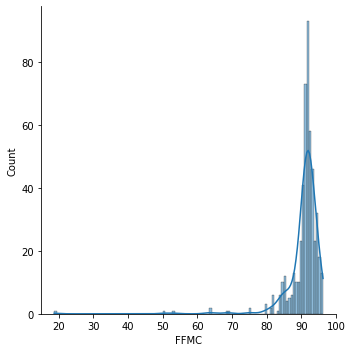

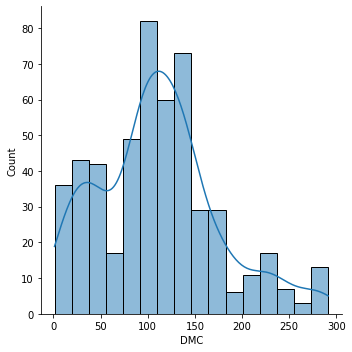

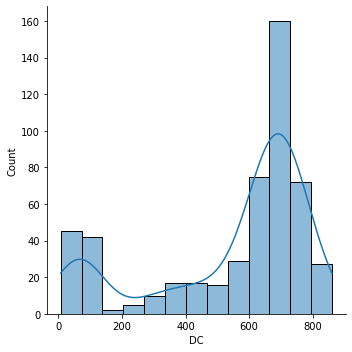

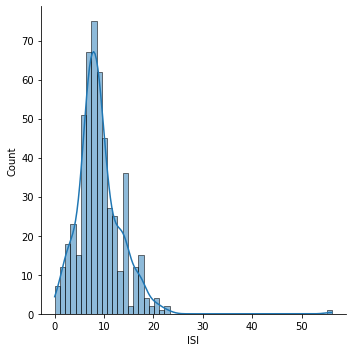

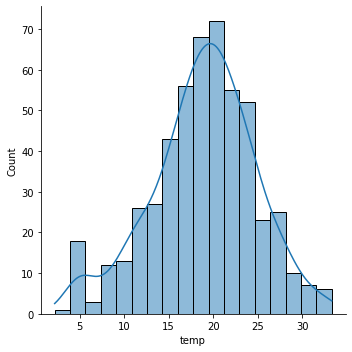

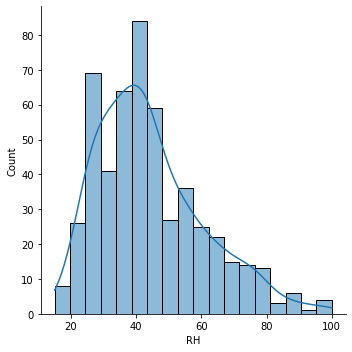

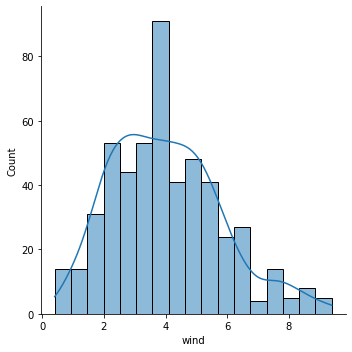

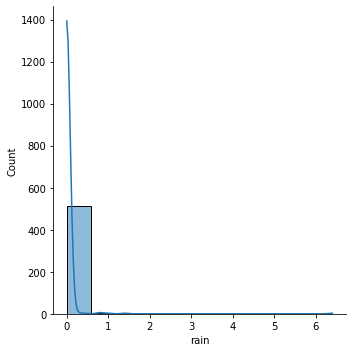

In [9]:
for x in ['X', 'Y', 'FFMC','DMC', 'DC', 'ISI', 'temp','RH','wind','rain']:
          sns.displot(data[x], kde=True)

**Creating a correlation matrix using Pearson's method to show how the attributes are correlated.**

In [10]:
data_corr = data.corr(method = 'pearson')
data_corr

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


**A heatmap of the correlation matrix for better visualization.**

<AxesSubplot:>

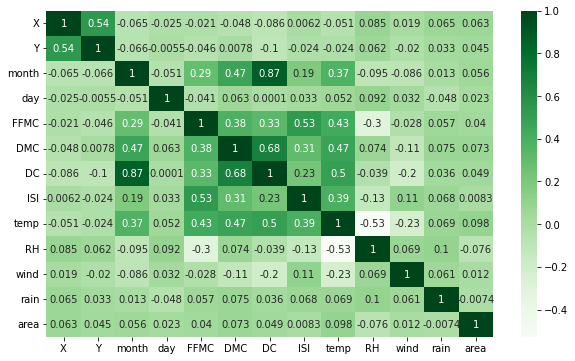

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data_corr,cmap='Greens', annot=True, fmt ='.2g')

**The correlation values of the attributes to the burnt area**

In [12]:
data_corr_area = abs(data_corr['area']).sort_values(ascending=False).drop('area', axis=0)
data_corr_area

temp     0.097844
RH       0.075519
DMC      0.072994
X        0.063385
month    0.056496
DC       0.049383
Y        0.044873
FFMC     0.040122
day      0.023226
wind     0.012317
ISI      0.008258
rain     0.007366
Name: area, dtype: float64

**Plot showing the correlation values of the attributes to the burnt area.**

<AxesSubplot:>

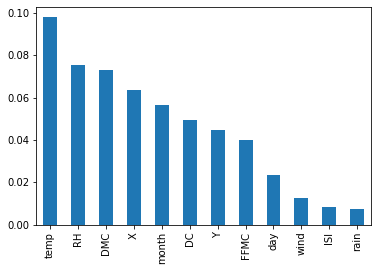

In [13]:
data_corr_area.plot.bar()

**CONCLUSION**

* The analysis showed that 98.2% of the fires burnt less than 100m² of the forest area.
* The highest occurrence of forest fires happened during the summer season, particularly in august and September.
* There was an increased spike in forest fires in march.
* More fires started on weekends compared to workdays. This could mean that most fires where caused by humans.
* The two most correlated attributes to burnt area are temperature and relative humidity.

**References**

Cortez, P and Morais, A. (2007). A data mining approach to predict forest fires using meteorological data. In: J.Neves, M.Santos,and J.Machado, editors. Proceeding of the Portuguese conference on artificial intelligence (EPIA, 2007). pp.512-523.